### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

Using TensorFlow backend.


### Define the class

In [2]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        #np.random.seed(42)
        self.architecture = architecture
        i, l, nodes, o = architecture
        # Alpha and layers
        self.alpha = alpha
        self.layers = l
        self.nodes = nodes
        #self.layers = layers
        #self.inputs = inputs
        # Bias
        self.b1 = np.random.randn(nodes)
        self.b = np.random.randn(l - 1, nodes)
        self.b2 = np.random.randn(o)
        # Weights
        self.w1 = np.random.randn(i, nodes)
        self.ws = np.zeros((l - 1, nodes, nodes))
        for i in range(l - 1):
            self.ws[i] = np.random.randn(nodes,nodes)
        self.w2 = np.random.randn(nodes,o)
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture ad learning rate
        #self.outputs = output
        #self.alpha = alpha
        pass
    
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self, X):  
        # applies the softmax function to a set of values
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        return x * (1 - x)
    
    def predict(self, inputs):
        # TODO: Define the predict function
        # First input
        l0 = inputs
        levels = np.zeros((self.layers,inputs.shape[0],self.nodes))
        levels[0] = self.sigmoid(np.dot(l0,self.w1)+self.b1)
        # Rest of layers
        for i in range(1, self.layers):
            levels[i] = self.sigmoid(np.dot(levels[i-1],self.ws[i-1])+self.b[i-1])
        # Last layer
        p = self.softmax(np.dot(levels[len(levels)-1], self.w2)+self.b2)
        return p,levels
        
    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        errors = []
        for i in range(epochs):
            # Predict
            p, levels = self.predict(inputs)
            # First layer (last) prediction and error
            l0 = inputs#inputs
            ol = levels[len(levels)-1]
            il = p
            # Error
            error = labels-p
            errors.append(np.average(np.abs(error)))
            #Deltas
            delta = error * self.sigmoid_deriv(p)
            b_delta = np.sum(delta)
            self.b2 += b_delta * self.alpha#3
            #for j in range(x, -1, -1):
                #self.ws[j] += np.dot(levels[j].T, d)
                #self.bias[j] += np.sum(d) * self.alpha
                #e = np.dot(d, self.ws[j].T)
                #d = e * self.sigmoid_deriv(levels[j])
                #pass
            # output
            error = np.dot(delta, self.w2.T)
            self.w2 += np.dot(ol.T,delta)*self.alpha
            delta = error * self.sigmoid_deriv(ol)
            # rest of layers
            for i in range(self.layers-1):
                b_delta = np.sum(delta)
                self.b[len(self.b)-i-1] += b_delta * self.alpha 
                error = np.dot(delta, self.ws[len(self.ws)-i-1])
                self.ws[len(self.ws)-i-1] += np.dot(levels[len(levels)-i-2].T,delta)*self.alpha
                delta = error * self.sigmoid_deriv(levels[len(levels)-i-2])
            # Last propagation
            b_delta = np.sum(delta)
            self.b1+= b_delta * self.alpha
            self.w1 += np.dot(l0.T,delta)*self.alpha
            # Print error
            if(i % displayUpdate == 0):
                print("Error:", np.mean(np.abs(error)))
        return errors

### Test datasets

#### XOR

In [3]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T
classes_labels = np.array([0]*2 + [1]*2)
classes_one_hot_labels = np.zeros((4, 2))
for i in range(4):  
    classes_one_hot_labels[i, XOR_labels[i]] = 1

Error: 0.1513938544862546
Error: 0.06719717777006935
Error: 0.05673057250745904
Error: 0.05416954902291067
Error: 0.05311793043578223
Error: 0.052590534995249266
Error: 0.05229439397918305
Error: 0.05211300555363171
Error: 0.051990072023207504
Error: 0.05189175734488212
[[0.84709878 0.15290122]
 [0.01511734 0.98488266]
 [0.01381675 0.98618325]
 [0.84976424 0.15023576]]


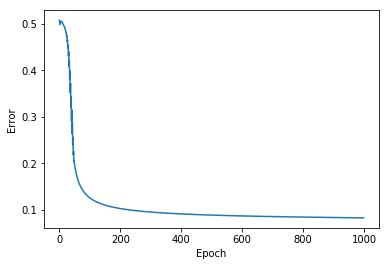

In [4]:
#TODO: Test the class with the XOR data
i=2
h_l = 1
n = 4
o = 2
architecture = i, h_l, n, o
network = NeuralNetwork(architecture, alpha = 5)
errors = network.train(XOR_inputs,classes_one_hot_labels)
print(network.predict(XOR_inputs)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### Multiple classes

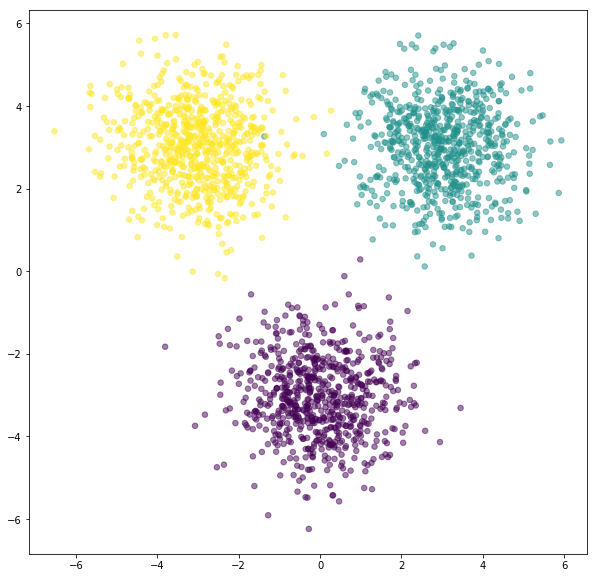

In [5]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Error: 0.1101453510323668
Error: 0.05704464363049516
Error: 0.05808701607609398
Error: 0.0585847614796205
Error: 0.058815071823287254
Error: 0.05889628041356059
Error: 0.05888368262050681
Error: 0.058807121235595054
Error: 0.05868433427626966
Error: 0.058526610576934056
[[0.22316553 0.15522004 0.62161444]]


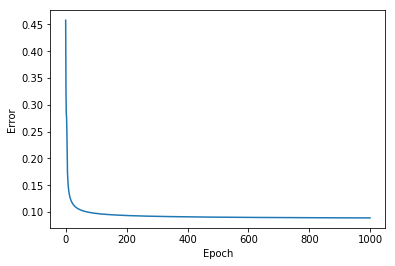

In [6]:
#TODO: Test the class with the multiple classes data
architecture = 2, 1, 3, 3
network = NeuralNetwork(architecture, alpha = 0.01)
errors = network.train(feature_set,one_hot_labels)

test = np.array([[-2,2]])
print(network.predict(test)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

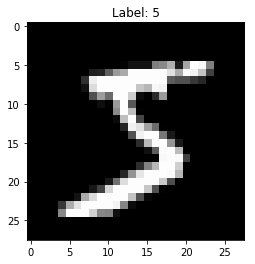

In [7]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [8]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

Error: 0.08820940925380283
Error: 0.09316836250419369
Error: 0.09616502431985789
Error: 0.09799723365050016
Error: 0.09870431919119874
Error: 0.09872808694896536
Error: 0.09839716003816536
Error: 0.09786147925008674
Error: 0.097216825808099
Error: 0.0965347265703712
Error: 0.0958680283577165
Error: 0.09522225274319897
Error: 0.09457025737859447
Error: 0.09392438229823774
Error: 0.09327636518348825
Error: 0.09263479921487149
Error: 0.09201968944369844
Error: 0.09143436398823332
Error: 0.09088287253812584
Error: 0.09037280410925673
Error: 0.0899107338448511
Error: 0.08948549179728259
Error: 0.0890781723840453
Error: 0.0886895178396068
Error: 0.08831330572266186
Error: 0.08794133208324204
Error: 0.0875667900799106
Error: 0.08719101961146539
Error: 0.08680380752310568
Error: 0.08640803685765791
Error: 0.08600966624392281
Error: 0.08561206690047585
Error: 0.08520428387732804
Error: 0.08479591111352928
Error: 0.08438846237060244
Error: 0.08398326289480144
Error: 0.08358232805840479
Error: 0.

Error: 0.05351640953498465
Error: 0.053527603899786474
Error: 0.05353899530584466
Error: 0.05355082954192228
Error: 0.053562977839531956
Error: 0.053575623994190726
Error: 0.053588527354601234
Error: 0.05360160628554969
Error: 0.05361483710320029
Error: 0.05362806795352011
Error: 0.053641454115574395
Error: 0.05365471932272875
Error: 0.053668221807424275
Error: 0.05368189571631639
Error: 0.05369553623125847
Error: 0.05370923867713691
Error: 0.053723074353643534
Error: 0.05373722103855292
Error: 0.05375157176073392
Error: 0.05376611751213966
Error: 0.05378088508059771
Error: 0.05379575259984737
Error: 0.053810576035369935
Error: 0.053825500752584694
Error: 0.05384049941831842
Error: 0.053855461143225654
Error: 0.053870562073615944
Error: 0.05388579721525761
Error: 0.05390090930010685
Error: 0.05391598696082636
Error: 0.05393108111965115
Error: 0.05394609207974828
Error: 0.05396085152118637
Error: 0.05397545418152889
Error: 0.05398993818526256
Error: 0.05400440422493554
Error: 0.05401878

Error: 0.053081152330970986
Error: 0.05306641287165234
Error: 0.05305155443226346
Error: 0.05303662898891486
Error: 0.05302164999375739
Error: 0.05300657806400352
Error: 0.052991396487080684
Error: 0.05297614463451059
Error: 0.052960859809871044
Error: 0.05294554118413756
Error: 0.052930212430384524
Error: 0.05291486930533064
Error: 0.052899475534533044
Error: 0.052884139529883335
Error: 0.05286874887737973
Error: 0.05285341862774675
Error: 0.05283817584847145
Error: 0.052823035107906
Error: 0.05280781545271845
Error: 0.05279244697072262
Error: 0.0527770625844352
Error: 0.05276171628174808
Error: 0.05274642384293157
Error: 0.052731086709379406
Error: 0.052715709076705176
Error: 0.052700302670657166
Error: 0.05268483317268112
Error: 0.05266928021963329
Error: 0.05265375508735911
Error: 0.052638190968130785
Error: 0.052622693316799245
Error: 0.052607173505445866
Error: 0.05259181901940168
Error: 0.052576451644945156
Error: 0.05256111965921961
Error: 0.0525458284242451
Error: 0.0525304738

Error: 0.04706650278828234
Error: 0.04703791584791279
Error: 0.04700931177758029
Error: 0.04698069844156559
Error: 0.0469520465008444
Error: 0.04692340262453374
Error: 0.04689478079815671
Error: 0.04686613491054591
Error: 0.04683747449565716
Error: 0.046808767208144926
Error: 0.04678003474591238
Error: 0.04675126606179566
Error: 0.046722461385590774
Error: 0.04669356497792464
Error: 0.046664751231194984
Error: 0.04663585965937239
Error: 0.04660688150412496
Error: 0.046577875110878415
Error: 0.04654884359569056
Error: 0.04651979853734385
Error: 0.04649070845943571
Error: 0.0464615763060397
Error: 0.04643238499461217
Error: 0.04640313824642022
Error: 0.04637388087694581
Error: 0.04634458990124078
Error: 0.04631526110872234
Error: 0.04628591065927396
Error: 0.04625654756912713
Error: 0.04622719374927625
Error: 0.04619781596054501
Error: 0.04616837390939834
Error: 0.04613891187365688
Error: 0.04610947645376678
Error: 0.046080032442237795
Error: 0.046050584529018106
Error: 0.046021110286577

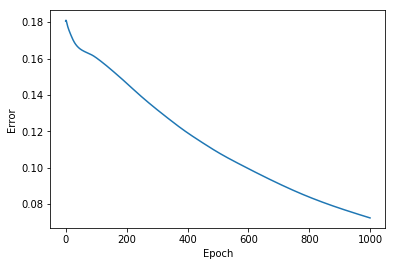

In [9]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.
architecture = 784, 2, 64, 10
network = NeuralNetwork(architecture, alpha =  0.001)
errors = network.train(train_images[0:1000],train_labels[0:1000])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

Error: 0.06402644571039086
Error: 0.07006979950943634
Error: 0.07332156007047821
Error: 0.07557553610904226
Error: 0.07723474296539362
Error: 0.07794083484198808
Error: 0.07782927569712923
Error: 0.07735106522428645
Error: 0.0768623063572583
Error: 0.07641042481886394
Error: 0.0759265774427173
Error: 0.0753950905159013
Error: 0.0747948229799593
Error: 0.07414339393032547
Error: 0.07345795215635773
Error: 0.07275443610738613
Error: 0.07205877622879818
Error: 0.07143559400380949
Error: 0.07093946932376799
Error: 0.07056728774112112
Error: 0.07021873872945347
Error: 0.06983910182285011
Error: 0.06941574578222925
Error: 0.06893198994724332
Error: 0.06840001521122333
Error: 0.06784516494341694
Error: 0.06727283700625056
Error: 0.066699102629224
Error: 0.0661359238058509
Error: 0.065591148821266
Error: 0.06507518727288572
Error: 0.06459522992903119
Error: 0.06415238478559747
Error: 0.06374981132540929
Error: 0.06337529682391461
Error: 0.06302103606192623
Error: 0.0626824540776748
Error: 0.06

Error: 0.046803464408397805
Error: 0.04681709990914334
Error: 0.046830602178858025
Error: 0.04684385842049624
Error: 0.046857028751922464
Error: 0.0468699784264315
Error: 0.04688280997432105
Error: 0.046895561649964584
Error: 0.04690827221430431
Error: 0.04692084945948132
Error: 0.046933168670235184
Error: 0.046945397839337356
Error: 0.04695736039674978
Error: 0.04696909663816345
Error: 0.04698057179746985
Error: 0.04699206488697488
Error: 0.04700346321454838
Error: 0.047014792303976455
Error: 0.047025851444004
Error: 0.0470368170255098
Error: 0.04704759636564175
Error: 0.04705845533346834
Error: 0.04706916558934189
Error: 0.04707977314271945
Error: 0.04709031534182481
Error: 0.04710076727600927
Error: 0.047111230143660095
Error: 0.04712166704411423
Error: 0.047132158006705366
Error: 0.04714274350490291
Error: 0.04715326932050367
Error: 0.04716366187549899
Error: 0.047173979231905076
Error: 0.047184163409204415
Error: 0.04719418048640216
Error: 0.047204145732219614
Error: 0.04721409954

Error: 0.045854836838181375
Error: 0.045842884054257016
Error: 0.0458309184159798
Error: 0.04581893040111197
Error: 0.04580690430352681
Error: 0.045794838951897586
Error: 0.04578282347799717
Error: 0.04577079071345667
Error: 0.04575871491356711
Error: 0.04574660840224287
Error: 0.04573446805804574
Error: 0.04572231666165522
Error: 0.04571016430168514
Error: 0.045697987945233595
Error: 0.0456857995684494
Error: 0.045673550237131225
Error: 0.04566129559611918
Error: 0.045648990635367835
Error: 0.045636692078472714
Error: 0.045624419094040594
Error: 0.04561211328585034
Error: 0.045599768566968554
Error: 0.045587462866548044
Error: 0.04557514568417382
Error: 0.04556283228453473
Error: 0.0455505403627413
Error: 0.04553831388695659
Error: 0.04552607119120316
Error: 0.0455137595011317
Error: 0.04550140168674243
Error: 0.04548905406886484
Error: 0.04547668625125986
Error: 0.04546435640277207
Error: 0.04545199147485009
Error: 0.04543962481569319
Error: 0.04542722383927726
Error: 0.0454148147587

Error: 0.041682703316115406
Error: 0.041669275790997
Error: 0.041655873160741305
Error: 0.0416424688548227
Error: 0.04162907241789582
Error: 0.04161575908656715
Error: 0.04160252817665493
Error: 0.04158931277674757
Error: 0.04157612259056514
Error: 0.0415629217390757
Error: 0.04154974783685121
Error: 0.041536583316167365
Error: 0.041523427714490906
Error: 0.04151029578670088
Error: 0.041497218884493356
Error: 0.04148419123287018
Error: 0.04147116204464704
Error: 0.041458149651194515
Error: 0.04144511673401935
Error: 0.04143206385144935
Error: 0.0414190027143088
Error: 0.04140592127861085
Error: 0.04139281802484179
Error: 0.04137971760204621
Error: 0.04136664531420239
Error: 0.041353577532740736
Error: 0.04134054655234083
Error: 0.04132752219711989
Error: 0.04131450013220073
Error: 0.04130153420208002
Error: 0.04128864434081448
Error: 0.041275742855150156
Error: 0.04126286727853779
Error: 0.041249974501944835
Error: 0.04123710499477475
Error: 0.04122422568845458
Error: 0.041211365913342

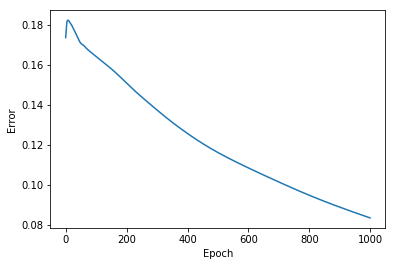

In [10]:
# Testing data Test the training of the network with the test_images data
network2 = NeuralNetwork(architecture, alpha =  0.001)
errors = network2.train(test_images[0:1000],test_labels[0:1000])
f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**

The numbers are written wrong or with poor calligraphy, even a person may confuse those numbers

2. **What could you try doing to improve the classification accuracy?**

Upscale the images so we have more resolution to classify them and maybe add another class for numbers considered unreadable